In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define path to your data directory
data_dir = r"C:\Users\Pravallika\mini project code\test\test"

# Create a data generator for training and a separate one for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Set the validation split; here 20% of the data will be used for validation
)

# Prepare training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify that this is the training subset
)

# Prepare validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation subset
)

Found 5417 images belonging to 4 classes.
Found 1351 images belonging to 4 classes.


In [3]:
# Remaining imports and data generators remain the same

# Load the ResNet50 model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers except the last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Add new classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set a learning rate 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,  # Increased epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=[learning_rate_reduction]
)


Epoch 1/20
169/169 [==============================] - 470s 3s/step - loss: 0.7500 - accuracy: 0.6813 - val_loss: 1.9459 - val_accuracy: 0.2686 - lr: 1.0000e-04
Epoch 2/20
169/169 [==============================] - 436s 3s/step - loss: 0.6067 - accuracy: 0.7545 - val_loss: 5.8435 - val_accuracy: 0.2775 - lr: 1.0000e-04
Epoch 3/20
169/169 [==============================] - 426s 3s/step - loss: 0.5647 - accuracy: 0.7801 - val_loss: 2.1862 - val_accuracy: 0.3527 - lr: 1.0000e-04
Epoch 4/20
169/169 [==============================] - 414s 2s/step - loss: 0.5288 - accuracy: 0.7935 - val_loss: 5.6916 - val_accuracy: 0.3103 - lr: 1.0000e-04
Epoch 5/20
169/169 [==============================] - 1193s 7s/step - loss: 0.5168 - accuracy: 0.7991 - val_loss: 1.1134 - val_accuracy: 0.5506 - lr: 1.0000e-04
Epoch 6/20
169/169 [==============================] - 492s 3s/step - loss: 0.4904 - accuracy: 0.8054 - val_loss: 2.9359 - val_accuracy: 0.5305 - lr: 1.0000e-04
Epoch 7/20
169/169 [===================

In [5]:
# Save the trained model
import os
model.save(os.path.join(r"C:\Users\Pravallika\mini project code", "model.h5"))
print("Model saved successfully.")


C:\Users\Pravallika\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


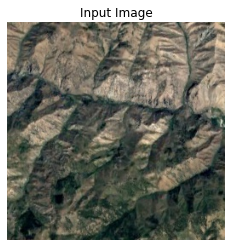

1/1 [==============================] - 2s 2s/step
Predicted class: Rocky


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Function to predict the class of the input image
def predict_image_class(model, img_path):
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)
    class_index = np.argmax(prediction)
    if class_index == 0:
        return "Grassy"
    elif class_index == 1:
        return "Marshy"
    elif class_index == 2:
        return "Rocky"
    elif class_index == 3:
        return "Sandy"
    else:
        return "Unknown"

# Load the trained model with full path
model = tf.keras.models.load_model(r"C:\Users\Pravallika\mini project code\model.h5")

# Path to the input image
input_image_path = r"C:\Users\Pravallika\mini project code\train\train\Rocky\Rocky (1)_0_13.png"
# Load and plot the input image
input_image = image.load_img(input_image_path)
plt.imshow(input_image)
plt.title("Input Image")
plt.axis('off')  # Turn off axis
plt.show()

# Predict the class of the input image
predicted_class = predict_image_class(model, input_image_path)

# Print the predicted class
print("Predicted class:", predicted_class)


